# PROJECT 1: DATA ANALYSIS PROJECT

Python-biblioteker importeres til datahåndtering, visualisering og hentning af data fra Danmarks Statistik. dst api installeres hvis ikke gjort

In [1]:
#pip install git+https://github.com/alemartinello/dstapi.git

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

# --- Import packages ---
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

from dstapi import DstApi

In [3]:
# Henter PRIS113 (KPI) fra dstapi

api = DstApi('PRIS113')
params = api._define_base_params(language='da') #på dansk, elllers kan "da" substitueres med "en"
data = api.get_data(params)

#sætter tidsgrænse fra 2010
data = data[data['TID'] >= '2010M01']

#sørger for at koden er robust i forhold til navne (altså at den kan kodes på dansk og engelsk)
rename_map = {
    'TID':'time', 'time':'time',
    'INDHOLD':'value', 'value':'value',
    'TYPE':'type', 'type':'type'
}
for k,v in list(rename_map.items()):
    if k in data.columns:
        data = data.rename(columns={k:v})

# behold kun det nødvendige
data = data[['time','value']].copy()

# Vis de første 5 rækker
print(data.head())

# Alternativt (pænere visning i Jupyter/VS Code):
from IPython.display import display
display(data.head())

       time  value
90  2010M01   91.6
91  2010M05   93.4
92  2010M09   93.9
93  2011M01   94.1
94  2011M05   96.3


,time,value
90,2010M01,91.6
91,2010M05,93.4
92,2010M09,93.9
93,2011M01,94.1
94,2011M05,96.3


In [4]:
#Data redigering
# sørger for datoformat
data['date'] = pd.to_datetime(data['time'], format='%YM%m')
data = data.sort_values('date').reset_index(drop=True)

#Til opgave 1.1.1 laves indeks=2020
data['value'] = pd.to_numeric(data['value'], errors='coerce')  # konverterer til float
data['year'] = data['date'].dt.year
cpi_2020_mean = data.loc[data['year']==2020, 'value'].mean() #udregner gns. af 2020
data['cpi_2020avg_100'] = 100 * data['value'] / cpi_2020_mean #laver indeks=2020

# til opgave 1.1.2 og 1.1.3 laves The month-to-month inflation rate and The 12-month inflation rate
data['infl_mom'] = data['value'].pct_change()                        # (P_t/P_{t-1} - 1)
data['infl_12m'] = data['value'].pct_change(12)                      # (P_t/P_{t-12} - 1)


# Vis de første 5 rækker
print(data.head(20))

# Alternativt (pænere visning i Jupyter/VS Code):
from IPython.display import display
display(data.head())
data_plot = data.copy()

       time  value       date  year  cpi_2020avg_100  infl_mom  infl_12m
0   2010M01   91.6 2010-01-01  2010        88.559459       NaN       NaN
1   2010M02   92.7 2010-02-01  2010        89.622946  0.012009       NaN
2   2010M03   93.3 2010-03-01  2010        90.203029  0.006472       NaN
3   2010M04   93.4 2010-04-01  2010        90.299710  0.001072       NaN
4   2010M05   93.4 2010-05-01  2010        90.299710  0.000000       NaN
5   2010M06   93.3 2010-06-01  2010        90.203029 -0.001071       NaN
6   2010M07   93.2 2010-07-01  2010        90.106349 -0.001072       NaN
7   2010M08   93.6 2010-08-01  2010        90.493071  0.004292       NaN
8   2010M09   93.9 2010-09-01  2010        90.783113  0.003205       NaN
9   2010M10   93.8 2010-10-01  2010        90.686432 -0.001065       NaN
10  2010M11   93.9 2010-11-01  2010        90.783113  0.001066       NaN
11  2010M12   94.0 2010-12-01  2010        90.879794  0.001065       NaN
12  2011M01   94.1 2011-01-01  2011        90.97647

,time,value,date,year,cpi_2020avg_100,infl_mom,infl_12m
0,2010M01,91.6,2010-01-01,2010,88.559459,NaN,NaN
1,2010M02,92.7,2010-02-01,2010,89.622946,0.012009,NaN
2,2010M03,93.3,2010-03-01,2010,90.203029,0.006472,NaN
3,2010M04,93.4,2010-04-01,2010,90.299710,0.001072,NaN
4,2010M05,93.4,2010-05-01,2010,90.299710,0.000000,NaN


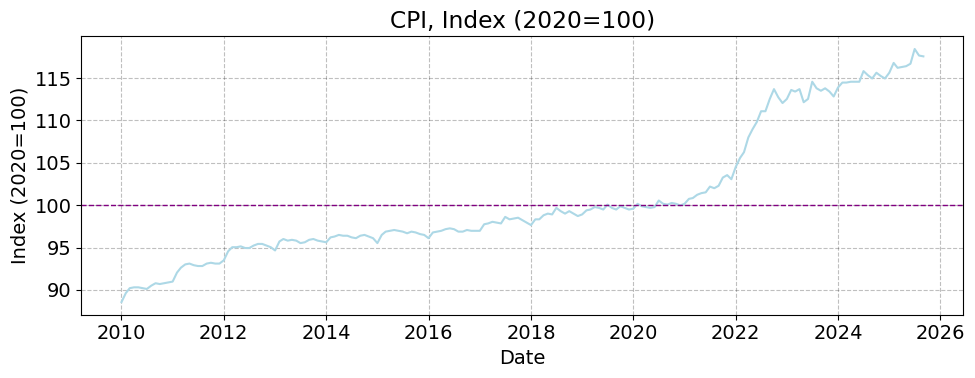

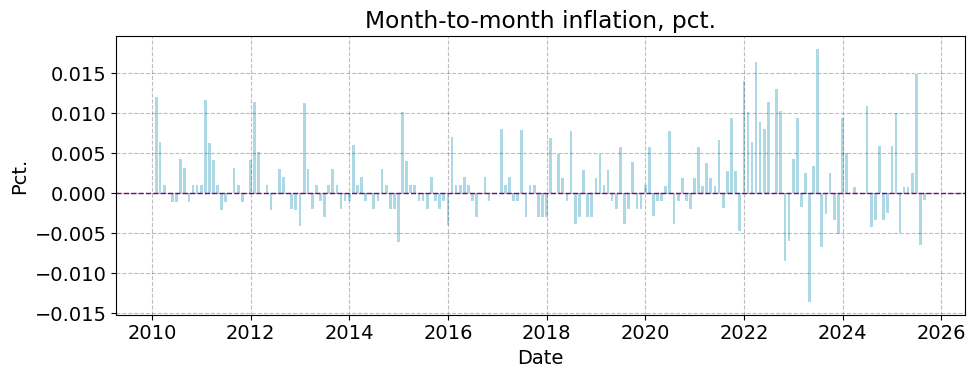

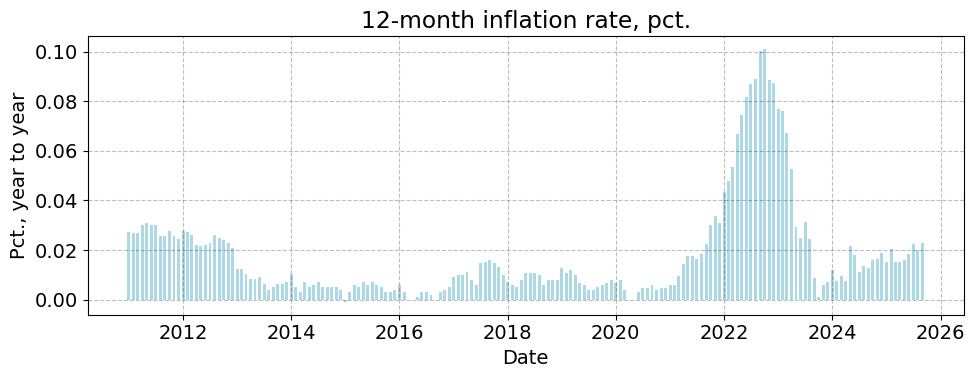

In [5]:
#Plots:

# Plot 1.1.1: CPI (Index 2020=100)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(data_plot['date'], data_plot['cpi_2020avg_100'], color='lightblue')
ax.axhline(100, linestyle='--', linewidth=1, color='purple')
ax.set_title('CPI, Index (2020=100)')
ax.set_ylabel('Index (2020=100)')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

# Plot 1.1.2: month-to-month inflation rate
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(data_plot['date'], data_plot['infl_mom'], width=20, color='lightblue')
ax.axhline(0, linestyle='--', linewidth=1, color='purple')
ax.set_title('Month-to-month inflation, pct.')
ax.set_ylabel('Pct.')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

# Plot 1.1.3: 12-month inflation rate
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(data_plot['date'], data_plot['infl_12m'], width=20, color='lightblue')
ax.set_title('12-month inflation rate, pct.')
ax.set_ylabel('Pct., year to year')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()


## 2.1

In [6]:
#pip install pandas_datareader

In [14]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [15]:
from fredapi import Fred
fred = Fred(api_key="60c118ce211cbc54a03242bbf7dc7c19")

Number of rows downloaded: 549


,TYPE,TID,INDHOLD
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M05,34.5
2,Consumer price index,1980M09,35.5
3,Consumer price index,1981M01,36.5
4,Consumer price index,1981M05,38.6



After filtering (from 2010): 189 observations


,TYPE,TID,INDHOLD
90,Consumer price index,2010M01,91.6
91,Consumer price index,2010M05,93.4
92,Consumer price index,2010M09,93.9
93,Consumer price index,2011M01,94.1
94,Consumer price index,2011M05,96.3



CPI data after cleaning:


,time,CPI,date
90,2010M01,91.6,2010-01-01
228,2010M02,92.7,2010-02-01
366,2010M03,93.3,2010-03-01
502,2010M04,93.4,2010-04-01
91,2010M05,93.4,2010-05-01


CPI date range: 2010-01-01 00:00:00 → 2025-09-01 00:00:00

HICP date range: 1996-01-01 00:00:00 → 2025-09-01 00:00:00
Number of rows downloaded from FRED: 357


,date,HICP
0,1996-01-01,70.4
1,1996-02-01,70.8
2,1996-03-01,71.3
3,1996-04-01,71.5
4,1996-05-01,71.7



Merging CPI and HICP
Number of overlapping observations (since 2010): 189
Columns: ['time', 'CPI', 'date', 'HICP']
Date range: 2010-01 → 2025-09

Full merged dataset:


,time,CPI,date,HICP
0,2010M01,91.6,2010-01-01,92.5
1,2010M02,92.7,2010-02-01,93.4
2,2010M03,93.3,2010-03-01,94.0
3,2010M04,93.4,2010-04-01,94.2
4,2010M05,93.4,2010-05-01,94.2
...,...,...,...,...
184,2025M05,120.4,2025-05-01,120.5
185,2025M06,120.7,2025-06-01,120.9
186,2025M07,122.5,2025-07-01,122.9
187,2025M08,121.7,2025-08-01,122.0



=== STEP 4: Normalizing both series to average = 100 in 2020 ===
Average values in 2020:


,CPI,HICP
0,103.433333,102.875



Merged data after normalization:


,time,CPI,date,HICP,CPI_norm,HICP_norm
0,2010M01,91.6,2010-01-01,92.5,88.559459,89.914945
1,2010M02,92.7,2010-02-01,93.4,89.622946,90.789793
2,2010M03,93.3,2010-03-01,94.0,90.203029,91.373026
3,2010M04,93.4,2010-04-01,94.2,90.299710,91.567436
4,2010M05,93.4,2010-05-01,94.2,90.299710,91.567436



=== STEP 5: Plot CPI vs HICP ===


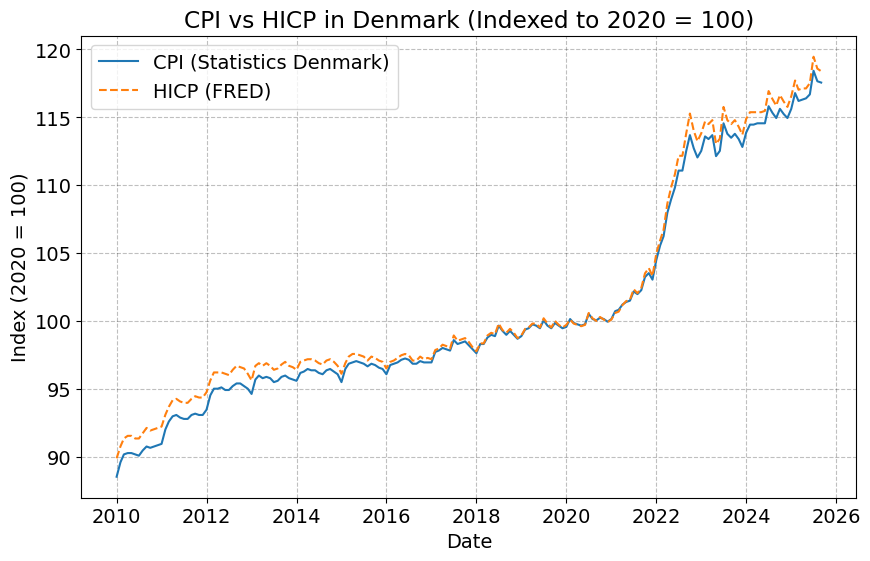

In [17]:
# --- STEP 1: Download CPI data from Statistics Denmark ---
print("Downloading CPI from Statistics Denmark")
api = DstApi('PRIS113')
params = api._define_base_params(language='en')
data = api.get_data(params)

# print initial info
print(f"Number of rows downloaded: {len(data)}")
display(data.head())

# keep only 2010 and onward
data = data[data['TID'] >= '2010M01']
print(f"\nAfter filtering (from 2010): {len(data)} observations")
display(data.head())

# rename to english (standardized names)
rename_map = {
    'TID': 'time', 'time': 'time',
    'INDHOLD': 'value', 'value': 'value',
    'TYPE': 'type', 'type': 'type'
}
for k, v in rename_map.items():
    if k in data.columns:
        data = data.rename(columns={k: v})

# create CPI DataFrame
df_cpi = data[['time', 'value']].copy()
df_cpi['date'] = pd.to_datetime(df_cpi['time'], format='%YM%m')
df_cpi = df_cpi.sort_values('date')
df_cpi = df_cpi.rename(columns={'value': 'CPI'})

print("\nCPI data after cleaning:")
display(df_cpi.head())
print(f"CPI date range: {df_cpi['date'].min()} → {df_cpi['date'].max()}")

# --- STEP 2: Download HICP data from FRED (full range) ---
print("\nDownloading HICP from FRED (using fredapi)")
from fredapi import Fred
fred = Fred(api_key="60c118ce211cbc54a03242bbf7dc7c19")

hicp = fred.get_series('CP0000DKM086NEST').reset_index()
hicp.columns = ['date', 'HICP']

print(f"HICP date range: {hicp['date'].min()} → {hicp['date'].max()}")
print(f"Number of rows downloaded from FRED: {len(hicp)}")
display(hicp.head())

# --- STEP 3: Merge datasets ---
print("\nMerging CPI and HICP")
merged = pd.merge(df_cpi, hicp, on='date', how='inner')
merged = merged[merged['date'] >= '2010-01-01']

print(f"Number of overlapping observations (since 2010): {len(merged)}")
print(f"Columns: {list(merged.columns)}")
print(f"Date range: {merged['date'].min().strftime('%Y-%m')} → {merged['date'].max().strftime('%Y-%m')}")
print("\nFull merged dataset:")
display(merged)

# --- STEP 4: Normalize both indices to 2020 = 100 ---
print("\n=== STEP 4: Normalizing both series to average = 100 in 2020 ===")

# ensure numeric columns
merged['CPI'] = pd.to_numeric(merged['CPI'], errors='coerce')
merged['HICP'] = pd.to_numeric(merged['HICP'], errors='coerce')

# compute average CPI and HICP in 2020 (base period)
base_period = merged.loc[merged['date'].dt.year == 2020, ['CPI', 'HICP']].mean()
print("Average values in 2020:")
display(base_period.to_frame().T)

# normalize both series so that their 2020 average = 100
merged['CPI_norm'] = merged['CPI'] / base_period['CPI'] * 100
merged['HICP_norm'] = merged['HICP'] / base_period['HICP'] * 100

print("\nMerged data after normalization:")
display(merged.head())

# --- STEP 5: Plot CPI vs HICP ---
print("\n=== STEP 5: Plot CPI vs HICP ===")
plt.figure(figsize=(10,6))
plt.plot(merged['date'], merged['CPI_norm'], label='CPI (Statistics Denmark)')
plt.plot(merged['date'], merged['HICP_norm'], label='HICP (FRED)', linestyle='--')
plt.title('CPI vs HICP in Denmark (Indexed to 2020 = 100)')
plt.ylabel('Index (2020 = 100)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()
